In [1]:
import os
os.chdir("..")
os.chdir("../src")
from tool_preprocess_onehot import state_df_zip, convert_to_str






os.chdir("../data")
import pandas as pd
df = pd.read_csv("quejas-clientes-limpio.csv", low_memory=False)


c:\Users\unaif\anaconda3\envs\projecto\Lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\unaif\anaconda3\envs\projecto\Lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [2]:
import os

os.getcwd()

'c:\\Users\\unaif\\OneDrive\\Documentos\\Documentos_Clase_Data\\PROYECTOS\\nombre_proyecto_final_ML\\Projecto-Final-ML\\data'

In [3]:
df

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?,dias de retraso,weekday
0,1291006,Debt collection,Unknown or not specified,Communication tactics,Frequent or repeated calls,TX,76119,2015-03-19,2015-03-19,"Premium Asset Services, LLC",In progress,Yes,Unknown or not specified,0 days,Thursday
1,1290580,Debt collection,Medical,Cont'd attempts collect debt not owed,Debt is not mine,TX,77479,2015-03-19,2015-03-19,Accounts Receivable Consultants Inc.,Closed with explanation,Yes,Unknown or not specified,0 days,Thursday
2,1290564,Mortgage,FHA mortgage,"Application, originator, mortgage broker",Unknown or not specified,MA,2127,2015-03-19,2015-03-19,RBS Citizens,Closed with explanation,Yes,Yes,0 days,Thursday
3,1291615,Credit card,Unknown or not specified,Other,Unknown or not specified,CA,92592,2015-03-19,2015-03-19,Navy FCU,In progress,Yes,Unknown or not specified,0 days,Thursday
4,1292165,Debt collection,Non-federal student loan,Cont'd attempts collect debt not owed,Debt resulted from identity theft,OH,43068,2015-03-19,2015-03-19,Transworld Systems Inc.,In progress,Yes,Unknown or not specified,0 days,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28151,1178184,Debt collection,Unknown or not specified,Cont'd attempts collect debt not owed,Debt is not mine,TX,75201,2015-01-01,2015-01-01,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,No,0 days,Thursday
28152,1178183,Consumer loan,Vehicle loan,Taking out the loan or lease,Unknown or not specified,GA,30043,2015-01-01,2015-01-01,DriveTime,Closed with explanation,Yes,Unknown or not specified,0 days,Thursday
28153,1178182,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",Unknown or not specified,MN,55105,2015-01-01,2015-01-01,Regions,Closed with non-monetary relief,Yes,No,0 days,Thursday
28154,1178181,Payday loan,Unknown or not specified,Can't stop charges to bank account,Unknown or not specified,CA,92509,2015-01-01,2015-01-01,Moneytree Inc,Closed with explanation,Yes,Unknown or not specified,0 days,Thursday


In [4]:
df.fillna("Unknown or not specified", inplace=True)

In [5]:
df["Consumer disputed?"].unique()

array(['Unknown or not specified', 'Yes', 'No'], dtype=object)

In [6]:
df=df.drop(columns=["Date received",	"Date sent to company" ])
df=df[df["Company response"]!="In progress"]
df=df[df["Consumer disputed?"]!="Unknown or not specified"]

In [7]:
df.drop(columns=["Complaint ID", "ZIP code","dias de retraso"], inplace=True)
df

,Product,Sub-product,Issue,Sub-issue,State,Company,Company response,Timely response?,Consumer disputed?,weekday
2,Mortgage,FHA mortgage,"Application, originator, mortgage broker",Unknown or not specified,MA,RBS Citizens,Closed with explanation,Yes,Yes,Thursday
6,Consumer loan,Installment loan,Managing the loan or lease,Unknown or not specified,OH,"CashCall, Inc.",Closed with explanation,Yes,Yes,Wednesday
9,Debt collection,Payday loan,Taking/threatening an illegal action,Threatened arrest/jail if do not pay,TX,Cottonwood Financial Ltd.,Closed with explanation,Yes,Yes,Wednesday
14,Debt collection,"Other (phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,UT,Account Liquidation Services Inc.,Closed with non-monetary relief,Yes,Yes,Wednesday
22,Debt collection,Unknown or not specified,Improper contact or sharing of info,Contacted me after I asked not to,IL,"Municipal Collections Services, Inc.",Closed with explanation,Yes,Yes,Wednesday
...,...,...,...,...,...,...,...,...,...,...
28149,Credit reporting,Unknown or not specified,Improper use of my credit report,Report improperly shared by CRC,MI,Experian,Closed with explanation,Yes,No,Thursday
28150,Credit card,Unknown or not specified,Late fee,Unknown or not specified,AR,U.S. Bancorp,Closed with monetary relief,Yes,No,Thursday
28151,Debt collection,Unknown or not specified,Cont'd attempts collect debt not owed,Debt is not mine,TX,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,No,Thursday
28153,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",Unknown or not specified,MN,Regions,Closed with non-monetary relief,Yes,No,Thursday


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6006 entries, 2 to 28155
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Product             6006 non-null   object
 1   Sub-product         6006 non-null   object
 2   Issue               6006 non-null   object
 3   Sub-issue           6006 non-null   object
 4   State               6006 non-null   object
 5   Company             6006 non-null   object
 6   Company response    6006 non-null   object
 7   Timely response?    6006 non-null   object
 8   Consumer disputed?  6006 non-null   object
 9   weekday             6006 non-null   object
dtypes: object(10)
memory usage: 516.1+ KB


In [9]:
X=df.drop(columns=["Consumer disputed?"])

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6006 entries, 2 to 28155
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product           6006 non-null   object
 1   Sub-product       6006 non-null   object
 2   Issue             6006 non-null   object
 3   Sub-issue         6006 non-null   object
 4   State             6006 non-null   object
 5   Company           6006 non-null   object
 6   Company response  6006 non-null   object
 7   Timely response?  6006 non-null   object
 8   weekday           6006 non-null   object
dtypes: object(9)
memory usage: 469.2+ KB


In [11]:
y=df['Consumer disputed?'].apply(lambda x: 1 if x == 'Yes' else 0)

In [12]:
y

2        1
6        1
9        1
14       1
22       1
        ..
28149    0
28150    0
28151    0
28153    0
28155    1
Name: Consumer disputed?, Length: 6006, dtype: int64

In [13]:
df.shape

(6006, 10)

In [14]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import tensorflow as tf
from tensorflow import keras
from scikeras.wrappers import KerasClassifier
from imblearn.pipeline import  Pipeline
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
# --- Asumiendo que ya tienes el DataFrame df cargado y limpiado de NaNs básicos ---

# 1. Codificación binaria de la variable objetivo

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import ADASYN

In [15]:
X.columns

Index(['Product', 'Sub-product', 'Issue', 'Sub-issue', 'State', 'Company',
       'Company response', 'Timely response?', 'weekday'],
      dtype='object')

In [16]:
categorical_features=['Product', 'Sub-product', 'Issue', 'Sub-issue', 'State',
       'Company response', 'Timely response?', 'weekday', "Company"]




In [17]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features), 

    ],

    remainder='passthrough'  # deja pasar las numéricas sin tocar
)

In [18]:
model_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('oversampler', ADASYN(random_state=42)),

])

In [19]:
n_features=preprocessor.fit_transform(X).shape[1]
n_features

952

In [20]:
X_proceses=preprocessor.fit_transform(X)
X_proceses

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
X_proceses, y=ADASYN(random_state=42).fit_resample(X_proceses, y)

In [22]:



X_train, X_test, y_train, y_test = train_test_split(X_proceses, y, test_size = 0.20, random_state = 42, shuffle=True)

In [23]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [24]:


"""model = keras.Sequential([
    keras.layers.Input(shape=(n_features,)),
    keras.layers.Dense(50, activation='tanh'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(1, activation="sigmoid")   # 1 neurona + sigmoid
])"""

'model = keras.Sequential([\n    keras.layers.Input(shape=(n_features,)),\n    keras.layers.Dense(50, activation=\'tanh\'),\n    keras.layers.Dense(50, activation=\'relu\'),\n    keras.layers.Dense(1, activation="sigmoid")   # 1 neurona + sigmoid\n])'

In [25]:
model = keras.Sequential([
    keras.layers.Input(shape=(n_features,)), # dice el numeor de entrada


    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)), # aprende de forma no lineal  y evita sobreajuste
    keras.layers.BatchNormalization(), # normaliza la capa de salida, ayuda para que las capas aprnda de forma mas consistente
    keras.layers.Dropout(0.3),# Apaga aleatoriamente 30% de las neuronas durante el entrenamiento reduce sobreajuste
    keras.layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)), # mismo que la anterior pero decreciente
    keras.layers.BatchNormalization(),# normaliza
    keras.layers.Dropout(0.3),# Apaga aleatoriamente 30% de las neuronas durante el entrenamiento reduce sobreajuste



    keras.layers.Dense(1, activation="sigmoid")
])

In [26]:
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(0.001),
    loss="binary_crossentropy",
    metrics=[
        "accuracy",
        tf.keras.metrics.AUC(name="auc", curve="ROC")   # AUC‑ROC
    ]
)

In [27]:
early_stop = EarlyStopping(
    monitor='val_loss',      # Observa la pérdida en validación
    patience=20,             # Espera 20 épocas sin mejora antes de detener
    restore_best_weights=True # Restaura los mejores pesos
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,              # Reduce la tasa de aprendizaje a la mitad
    patience=10,             # Si no mejora en 10 épocas
    min_lr=1e-6
)

In [28]:
history = model.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=500, validation_split=0.2,
    callbacks=[early_stop, reduce_lr],
    
    
)

Epoch 1/500
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5738 - auc: 0.6036 - loss: 0.8825 - val_accuracy: 0.5142 - val_auc: 0.6893 - val_loss: 0.8193 - learning_rate: 0.0010
Epoch 2/500
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6456 - auc: 0.6989 - loss: 0.7348 - val_accuracy: 0.5142 - val_auc: 0.7480 - val_loss: 0.7945 - learning_rate: 0.0010
Epoch 3/500
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6811 - auc: 0.7412 - loss: 0.6779 - val_accuracy: 0.5331 - val_auc: 0.7839 - val_loss: 0.7335 - learning_rate: 0.0010
Epoch 4/500
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7277 - auc: 0.7977 - loss: 0.6145 - val_accuracy: 0.6331 - val_auc: 0.8093 - val_loss: 0.6726 - learning_rate: 0.0010
Epoch 5/500
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7462 - auc: 0.8248 - loss: 0.5756 - val_accuracy: 0.7250 - val_auc: 0.8376 - val_loss: 0.6103 - learning_rate: 0.0010
Epoch 6/500
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7761 - auc: 0.8509 -

In [29]:
y_prob=model.predict(X_test)

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [30]:
y_pred=(model.predict(X_test) >= 0.23).astype(int)

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step


In [31]:
y_pred

array([[1],
       [1],
       [1],
       ...,
       [0],
       [1],
       [1]])

In [32]:
import seaborn as sns

0.847027027027027
Accuracy: 0.847027027027027
Precision: 0.821743388834476
Recall: 0.8925531914893617
F1: 0.8556858745537991
AUC-ROC: 0.8462765957446808


'              precision    recall  f1-score   support\n\n           0       0.88      0.80      0.84       910\n           1       0.82      0.89      0.86       940\n\n    accuracy                           0.85      1850\n   macro avg       0.85      0.85      0.85      1850\nweighted avg       0.85      0.85      0.85      1850\n'

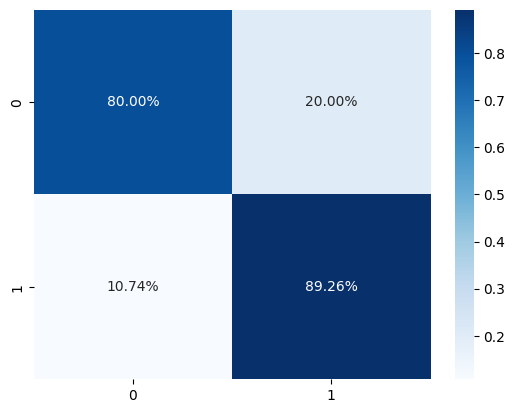

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
import seaborn as sns

print(accuracy_score(y_test, y_pred))
from sklearn.metrics import confusion_matrix



sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'), annot=True, 
            fmt='.2%', cmap='Blues');
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
"""print("cv", cross_validate(model, X_train,y_train))"""
"""print("train", model.score(X_train,y_train))
print("test",model.score(X_test,y_test)"""
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred))
classification_report(y_test, y_pred)

In [34]:
confusion_matrix(y_test, y_pred, normalize='true')

array([[0.8       , 0.2       ],
       [0.10744681, 0.89255319]])

In [35]:
classification_report(y_test, y_pred, )

'              precision    recall  f1-score   support\n\n           0       0.88      0.80      0.84       910\n           1       0.82      0.89      0.86       940\n\n    accuracy                           0.85      1850\n   macro avg       0.85      0.85      0.85      1850\nweighted avg       0.85      0.85      0.85      1850\n'

In [36]:
import numpy as np
thresholds = np.arange(.1, 1, 0.01)

best_threshold = 0
best_f1 = 0

for t in thresholds:
    # Convertir probabilidades en etiquetas según el threshold
    y_pred_t =  (y_prob > t).astype(int)
    ()
    
    # Calcular F1 para ese threshold
    current_f1 = f1_score(y_test, y_pred_t)
    
    # Guardar si es mejor que el mejor hasta ahora
    if current_f1 > best_f1:
        best_f1 = current_f1
        best_threshold = t

print(f"Mejor umbral (threshold) para F1: {best_threshold}")
print(f"Mejor F1 obtenido: {best_f1}")


Mejor umbral (threshold) para F1: 0.5099999999999998
Mejor F1 obtenido: 0.8677191072400653


In [37]:
import numpy as np
thresholds = np.arange(.001, 1.01, 0.01)

best_threshold = 0
best_f1 = 0

for t in thresholds:
    # Convertir probabilidades en etiquetas según el threshold
    y_pred_t =  (y_prob > t).astype(int)
    ()
    
    # Calcular F1 para ese threshold
    current_f1 = accuracy_score(y_test, y_pred_t)
    
    # Guardar si es mejor que el mejor hasta ahora
    if current_f1 > best_f1:
        best_f1 = current_f1
        best_threshold = t

print(f"Mejor umbral (threshold) para F1: {best_threshold}")
print(f"Mejor F1 obtenido: {best_f1}")

Mejor umbral (threshold) para F1: 0.5009999999999999
Mejor F1 obtenido: 0.8681081081081081


In [38]:
---

SyntaxError: invalid syntax (1947214667.py, line 1)

In [ ]:
# Guardar en formato nativo de Keras
os.chdir("../models")
model.save("modelo_dispute_red_vieja.keras")

In [ ]:
import joblib

os.chdir("../src")

# Guardar el scaler entrenado
joblib.dump(preprocessor, "preprocesador_red.pkl")

['preprocesador_red.pkl']